In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

In [4]:
# look at protein data 


protein_quant_current_normalized = tc.get(name='total-proteome--5c50', version=1, file='protein_quant_current_normalized')



protein_quant_current_normalized.index = protein_quant_current_normalized.loc[:,'Gene_Symbol']
protein_quant_current_normalized.columns = protein_quant_current_normalized.columns.str.split('_Ten').str[0]





protein_quant_current_normalized = protein_quant_current_normalized.loc[:,'MDAMB468_BREAST':].T


protein_quant_current_normalized = protein_quant_current_normalized[~protein_quant_current_normalized.index.duplicated(keep=False)]


In [5]:
sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')

sample_info.index = sample_info.loc[:,'CCLE_Name'] 

sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

In [6]:
sample_info_ = sample_info.copy()
sample_info_.index = sample_info_.loc[:,'DepMap_ID']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

skin v.s. blood: t-test independent samples, P_val=1.096e-01 stat=1.609e+00
blood v.s. ovary: t-test independent samples, P_val=1.711e-01 stat=-1.375e+00
colorectal v.s. skin: t-test independent samples, P_val=4.364e-02 stat=-2.037e+00
colorectal v.s. blood: t-test independent samples, P_val=4.875e-01 stat=-6.960e-01
skin v.s. ovary: t-test independent samples, P_val=9.732e-01 stat=3.362e-02
colorectal v.s. ovary: t-test independent samples, P_val=8.241e-02 stat=-1.752e+00


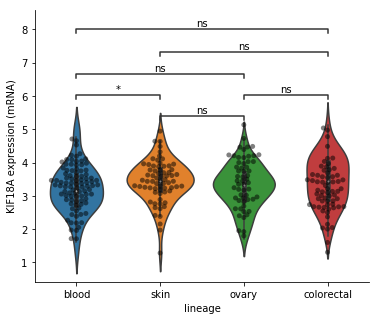

In [6]:
#shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index) 
shared =  set(public_19Q4_proteincoding_tpm.index) 


#without_na = gene_effect_rnai_relative.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


relative_box = public_19Q4_proteincoding_tpm.loc[shared]#gene_effect_rnai_relative.loc[shared]

relative_box['lineage'] = sample_info_.loc[relative_box.index,'lineage']




width = 0.4
relative_box['ploidy'] = anot.loc[relative_box.index,'many_arm_events']

trus = relative_box[relative_box.loc[:,'ploidy']==True].index 
relative_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = relative_box[relative_box.loc[:,'ploidy']==False].index 
relative_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want
relative_box.index = pd.Series(relative_box.index,name='CCLE_ID')
relative_box.columns = pd.Series(relative_box.columns,name=False)
to_drop = []

lines = relative_box.loc[:,'lineage'].copy()

relative_box.columns = relative_box.columns.str.split(' ').str[0]

for x in lines.index:

    if  lines.loc[x] != 'colorectal' \
        and lines.loc[x] != 'skin' and lines.loc[x] != 'ovary' \
        and lines.loc[x] != 'blood':
            to_drop.append(x)
            
relative_box_ = relative_box.drop(to_drop)


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="KIF18A",
                     data=relative_box_.loc[:,['KIF18A','lineage']] )#,palette = my_pal)#palette="muted")

ax = sns.swarmplot(x="lineage", y="KIF18A",
                     data=relative_box_.loc[:,['KIF18A','lineage']],color='black',alpha=.5,order=['blood','skin','ovary','colorectal'] )#,palette = my_pal)#palette="muted")

bp = [('blood','skin'),
     ('blood','ovary'),
     ('blood','colorectal'),
     ('skin','ovary'),
     ('skin','colorectal'),
     ('ovary','colorectal')]


add_stat_annotation(x="lineage", y="KIF18A", data=relative_box_.loc[:,['KIF18A','lineage']],
                    width=width,ax=ax, test='t-test_ind',box_pairs = bp)


plt.ylabel('KIF18A expression (mRNA)')
plotting.simpleaxis()


plt.savefig('kif18a_lineages_mrna_revision.png')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ovary v.s. blood: t-test independent samples, P_val=3.055e-01 stat=1.042e+00
skin v.s. colorectal: t-test independent samples, P_val=4.380e-02 stat=-2.074e+00
colorectal v.s. ovary: t-test independent samples, P_val=1.010e-01 stat=-1.681e+00
colorectal v.s. blood: t-test independent samples, P_val=8.330e-01 stat=-2.122e-01
skin v.s. ovary: t-test independent samples, P_val=3.599e-03 stat=-3.121e+00
skin v.s. blood: t-test independent samples, P_val=1.016e-01 stat=-1.678e+00


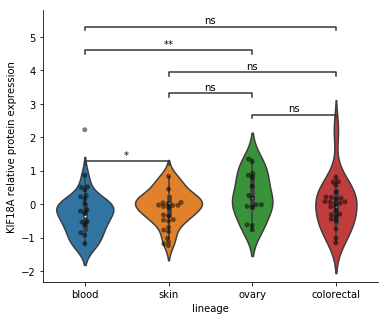

In [7]:

#shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index) 
shared =  set(protein_quant_current_normalized.index) 


#without_na = gene_effect_rnai_relative.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


relative_box = protein_quant_current_normalized.loc[shared]#gene_effect_rnai_relative.loc[shared]

relative_box['lineage'] = sample_info.loc[relative_box.index,'lineage']





relative_box['ploidy'] = anot_CCLE.loc[relative_box.index,'many_arm_events']

trus = relative_box[relative_box.loc[:,'ploidy']==True].index 
relative_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = relative_box[relative_box.loc[:,'ploidy']==False].index 
relative_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want
relative_box.index = pd.Series(relative_box.index,name='CCLE_ID')
relative_box.columns = pd.Series(relative_box.columns,name=False)
to_drop = []

lines = relative_box.loc[:,'lineage'].copy()

relative_box.columns = relative_box.columns.str.split(' ').str[0]

for x in lines.index:

    if  lines.loc[x] != 'colorectal' \
        and lines.loc[x] != 'skin' and lines.loc[x] != 'ovary' \
        and lines.loc[x] != 'blood':
            to_drop.append(x)
            
relative_box_ = relative_box.drop(to_drop)


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="KIF18A",
                     data=relative_box_.loc[:,['KIF18A','lineage']] )#,palette = my_pal)#palette="muted")

ax = sns.swarmplot(x="lineage", y="KIF18A",
                     data=relative_box_.loc[:,['KIF18A','lineage']],color='black',alpha=.5,order=['blood','skin','ovary','colorectal'] )#,palette = my_pal)#palette="muted")

bp = [('blood','skin'),
     ('blood','ovary'),
     ('blood','colorectal'),
     ('skin','ovary'),
     ('skin','colorectal'),
     ('ovary','colorectal')]


add_stat_annotation(x="lineage", y="KIF18A", data=relative_box_.loc[:,['KIF18A','lineage']],
                    width=width,ax=ax, test='t-test_ind',box_pairs = bp)


plt.ylabel('KIF18A relative protein expression')
plotting.simpleaxis()


plt.savefig('kif18a_lineages_protein_revision.png')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

blood_Diploid v.s. blood_Aneuploid: t-test independent samples, P_val=nan stat=nan
skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=6.942e-01 stat=4.098e-01
colorectal_Diploid v.s. colorectal_Aneuploid: t-test independent samples, P_val=6.531e-01 stat=-4.620e-01
ovary_Diploid v.s. ovary_Aneuploid: t-test independent samples, P_val=3.278e-03 stat=-4.134e+00


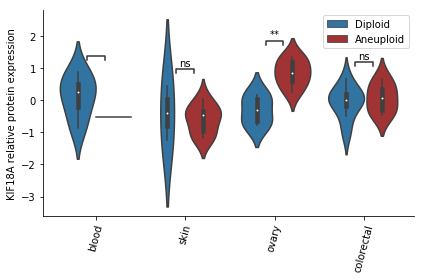

In [32]:
shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index) 
#shared =  set(protein_quant_current_normalized.index) 


#without_na = gene_effect_rnai_relative.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


relative_box = protein_quant_current_normalized.loc[shared]#gene_effect_rnai_relative.loc[shared]

relative_box['lineage'] = sample_info.loc[relative_box.index,'lineage']





relative_box['ploidy'] = anot_CCLE.loc[relative_box.index,'many_arm_events']

trus = relative_box[relative_box.loc[:,'ploidy']==True].index 
relative_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = relative_box[relative_box.loc[:,'ploidy']==False].index 
relative_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want
relative_box.index = pd.Series(relative_box.index,name='CCLE_ID')
relative_box.columns = pd.Series(relative_box.columns,name=False)
to_drop = []

lines = relative_box.loc[:,'lineage'].copy()

for x in lines.index:

    if  lines.loc[x] != 'skin' \
        and lines.loc[x] != 'colorectal' and lines.loc[x] != 'ovary' \
        and lines.loc[x] != 'blood':
            to_drop.append(x)
            
relative_box_ = relative_box.drop(to_drop)



ax = sns.violinplot(x="lineage", y="KIF18A", hue="ploidy",
                     data=relative_box_.loc[:,['KIF18A','lineage', 'ploidy']].dropna() ,palette = my_pal,hue_order=['Diploid','Aneuploid'],order=['blood','skin','ovary','colorectal'])#palette="muted")

new_pairs = []

for lin in set(relative_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

    
width = 0.4
add_stat_annotation(ax, data=relative_box_.loc[:,['KIF18A','lineage', 'ploidy']].dropna(), x='lineage', y='KIF18A', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=['blood','skin','ovary','colorectal'])




plt.xticks(rotation=75) 
plt.xlabel('')
plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.ylabel('KIF18A relative protein expression')
plt.tight_layout()

plt.savefig('kif18a_ploidy_lineages_revision_NEW.png')

In [11]:
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.loc[:,['KIF18A']]

In [12]:
# want to regress out lineage first from the expression data

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info_.loc[public_19Q4_proteincoding_tpm.index,'lineage'])
mu = public_19Q4_proteincoding_tpm_.mean()
reg = LinearRegression().fit(one_hot, public_19Q4_proteincoding_tpm_)
preds = pd.DataFrame(reg.predict(one_hot),index = public_19Q4_proteincoding_tpm_.index,columns = public_19Q4_proteincoding_tpm_.columns)

preds_ = preds 
corrected_mrna = ((public_19Q4_proteincoding_tpm_  - mu)- preds_)+ mu



In [11]:
protein_quant_current_normalized.loc[:,['KIF18A']]
sample_info
anot_CCLE
from scipy import stats

table = pd.DataFrame(columns = ['num_lines','num_true','num_false','t-stat','p-value'],index = set(sample_info.loc[anot_CCLE.index,'lineage']))

for lineage in set(sample_info.loc[anot_CCLE.index,'lineage']):
    all_lines = sample_info[sample_info.loc[:,'lineage'] == lineage].index
    all_lines = set(all_lines) & set(anot_CCLE.index) & set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index)
    trus = anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == True].index
    fals =  anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == False].index
    tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'KIF18A'].dropna(),protein_quant_current_normalized.loc[fals,'KIF18A'].dropna())
    table.loc[lineage] = [len(all_lines),len(trus),len(fals),tt,p_val]

    

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
table

,num_lines,num_true,num_false,t-stat,p-value
fibroblast,0,0,0,NaN,NaN
thyroid,1,1,0,NaN,NaN
urinary_tract,2,2,0,NaN,NaN
esophagus,7,7,0,NaN,NaN
skin,9,7,2,-0.409777,0.69422
bone,3,0,3,NaN,NaN
bile_duct,0,0,0,NaN,NaN
liver,4,4,0,NaN,NaN
lung,27,21,6,1.03628,0.309992
breast,11,10,1,NaN,NaN


In [13]:
table.to_csv('t_test_results_KIF18A_protein_per_lineage_NEW.csv')

In [22]:
an_full.index = an_full.loc[:,'CCLE_ID']

In [23]:
protein_quant_current_normalized.loc[:,['KIF18A']]
sample_info
anot_CCLE
import scipy
table2 = pd.DataFrame(columns = ['num_lines','R','p-value'],index = set(sample_info.loc[anot_CCLE.index,'lineage']))

for lineage in set(sample_info.loc[an_full.loc[:,'CCLE_ID'],'lineage']):
    all_lines = sample_info[sample_info.loc[:,'lineage'] == lineage].index
    all_lines = set(all_lines) & set(an_full.loc[:,'CCLE_ID']) & set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index)
#     trus = anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == True].index
#     fals =  anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == False].index
    #tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'KIF18A'].dropna(),protein_quant_current_normalized.loc[fals,'KIF18A'].dropna())
    r,p = scipy.stats.pearsonr(an_full.loc[all_lines,'num_arm_events'],protein_quant_current_normalized.loc[all_lines,'KIF18A'])


    table2.loc[lineage] = [len(all_lines),r,p]

    

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3005: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3006: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [24]:
table2

,num_lines,R,p-value
fibroblast,0,NaN,NaN
thyroid,1,NaN,NaN
urinary_tract,8,-0.276107,0.508009
esophagus,13,0.245124,0.419561
skin,22,-0.160448,0.475672
bone,5,0.148276,0.811904
bile_duct,1,NaN,NaN
liver,13,-0.158859,0.604199
lung,65,0.110365,0.381465
breast,23,-0.0620327,0.778573


In [25]:
table2.to_csv('correlation_results_KIF18A_protein_per_lineage_NEW.csv')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


p-value for BUB1B: 0.1735164000751114


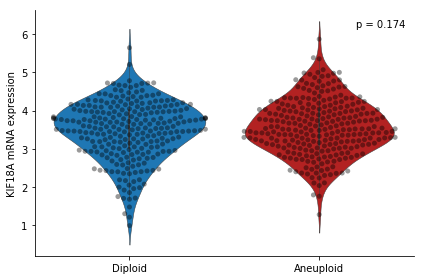

In [25]:
# shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index) 



# relative_box = public_19Q4_proteincoding_tpm.loc[shared]

# relative_box['ploidy'] = anot.loc[relative_box.index,'many_arm_events']

# trus = relative_box[relative_box.loc[:,'ploidy']==True].index 
# relative_box.loc[trus,'ploidy']= 'Aneuploid'
# falsee = relative_box[relative_box.loc[:,'ploidy']==False].index 
# relative_box.loc[falsee,'ploidy']=  'Diploid'

# ax = sns.violinplot(x="ploidy", y="KIF18A",
#                      data=relative_box_.loc[:,['KIF18A','lineage', 'ploidy']].dropna() ,palette = my_pal,hue_order=['Diploid','Aneuploid'])#palette="muted")








shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'KIF18A'].dropna(),public_19Q4_proteincoding_tpm.loc[falsee,'KIF18A'].dropna())
print('p-value for BUB1B: ' + str(p_val))
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
plotting.simpleaxis()
plt.ylabel('KIF18A mRNA expression')
plt.xlabel('')
plt.tight_layout()
plt.savefig('review_plots/kif18a_just_ploidy_mRNA_revision_NEW.png')



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


p-value for BUB1B: 0.14482310724707706


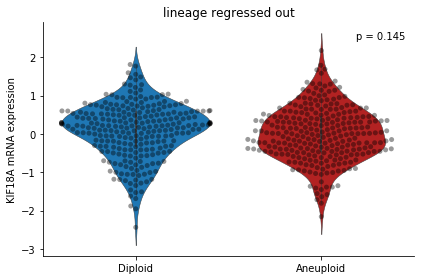

In [27]:




shared = set(anot.index) & set(corrected_mrna.index)
temp = corrected_mrna.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(corrected_mrna.loc[trus,'KIF18A'].dropna(),corrected_mrna.loc[falsee,'KIF18A'].dropna())
print('p-value for BUB1B: ' + str(p_val))
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
plotting.simpleaxis()
plt.ylabel('KIF18A mRNA expression')
plt.xlabel('')
plt.title('lineage regressed out')
plt.tight_layout()
plt.savefig('review_plots/kif18a_just_ploidy_mRNA_revision_lineage_regressed_out_NEW.png')




In [219]:
anot.loc[temp[temp.loc[:,'ploidy'] == 'Aneuploid'].index,'num_arm_events'].corr(temp.loc[temp[temp.loc[:,'ploidy'] == 'Aneuploid'].index,'KIF18A'])
            

-0.07296588300049223

In [15]:
an_full = pd.read_csv('aneuploidy_data_NEW.csv',index_col='DepMap_ID')

In [19]:
an_full

,num_arm_events,many_arm_events,CCLE_ID,RNAi_doubling_time,CCLE_doubling_time
DepMap_ID,,,,,
ACH-000001,26,True,NIHOVCAR3_OVARY,64.0,NaN
ACH-000002,6,False,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,28.0,113.3
ACH-000004,20,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,60.0,38.4
ACH-000005,19,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,116.0
ACH-000006,8,NaN,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,40.0,55.3
...,...,...,...,...,...
ACH-001249,16,NaN,YMB1_BREAST,NaN,NaN
ACH-001306,23,True,8305C_THYROID,NaN,121.6
ACH-001307,24,True,8505C_THYROID,NaN,NaN


In [234]:
pd.Series(Counter(sample_info_.loc[sh,'lineage'])).sort_values()

bile_duct                      7
prostate                       7
thyroid                       11
soft_tissue                   16
peripheral_nervous_system     16
bone                          18
urinary_tract                 23
liver                         24
plasma_cell                   25
esophagus                     27
uterus                        28
kidney                        29
upper_aerodigestive           31
fibroblast                    35
gastric                       39
pancreas                      41
skin                          48
ovary                         48
breast                        50
colorectal                    54
lymphocyte                    55
central_nervous_system        57
blood                         78
lung                         177
dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


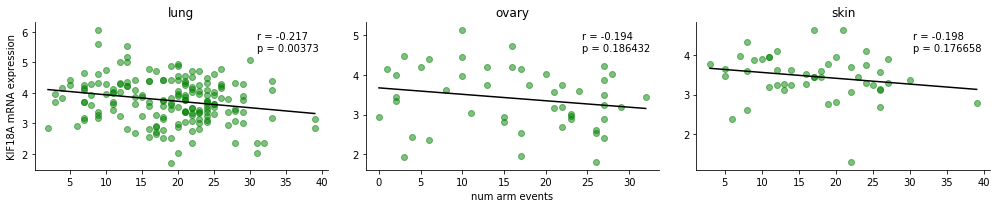

In [309]:

fig,ax = plt.subplots(1,3,figsize=(14,3))

col = sample_info_[sample_info_.loc[:,'lineage']=='lung'].index
sh = an_full.index & public_19Q4_proteincoding_tpm.index & col
ax[0].scatter(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
ax[0].plot(np.unique(an_full.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full.loc[sh,'num_arm_events'], public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'], 1))(np.unique(an_full.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'])
ax[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
ax[0].set_title('lung')


col = sample_info_[sample_info_.loc[:,'lineage']=='ovary'].index
sh = an_full.index & public_19Q4_proteincoding_tpm.index & col
ax[1].scatter(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
ax[1].plot(np.unique(an_full.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full.loc[sh,'num_arm_events'], public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'], 1))(np.unique(an_full.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'])
ax[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
ax[1].set_title('ovary')





col = sample_info_[sample_info_.loc[:,'lineage']=='skin'].index
sh = an_full.index & public_19Q4_proteincoding_tpm.index & col
ax[2].scatter(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
ax[2].plot(np.unique(an_full.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full.loc[sh,'num_arm_events'], public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'], 1))(np.unique(an_full.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'])
ax[2].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
ax[2].set_title('skin')






ax[1].set_xlabel('num arm events')
ax[0].set_ylabel('KIF18A mRNA expression')

plotting.simpleaxis(ax[0])
plotting.simpleaxis(ax[1])
plotting.simpleaxis(ax[2])





an_full.loc[sh,'num_arm_events'].corr(public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'])
plt.tight_layout()
plt.savefig('kif18a_mrna_lineages.png')

No handles with labels found to put in legend.


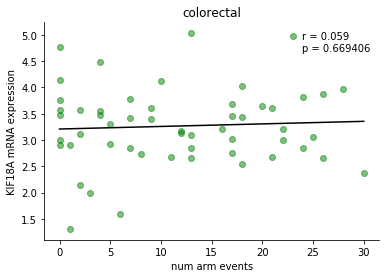

In [305]:
col = sample_info_[sample_info_.loc[:,'lineage']=='colorectal'].index
sh = an_full.index & public_19Q4_proteincoding_tpm.index & col
plt.scatter(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
plt.plot(np.unique(an_full.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full.loc[sh,'num_arm_events'], public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'], 1))(np.unique(an_full.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full.loc[sh,'num_arm_events'],public_19Q4_proteincoding_tpm.loc[sh,'KIF18A'])
plt.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
plt.title('colorectal')

plotting.simpleaxis()

plt.xlabel('num arm events')
plt.ylabel('KIF18A mRNA expression')


plt.savefig('kif18a_mrna_colorectal.png')

In [285]:
an_full_CCLE = an_full.copy()

In [287]:
an_full_CCLE.index = an_full_CCLE.loc[:,'CCLE_ID']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


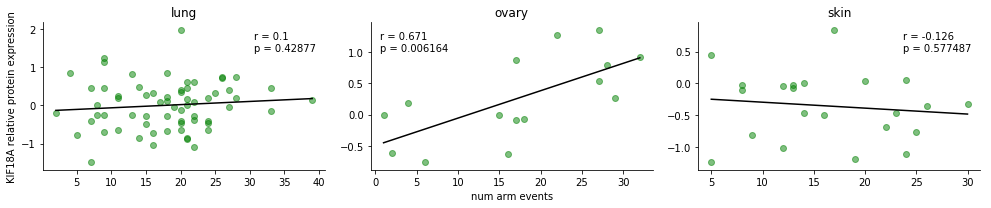

In [308]:

fig,ax = plt.subplots(1,3,figsize=(14,3))

col = sample_info[sample_info.loc[:,'lineage']=='lung'].index
sh = an_full_CCLE.index & protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index & col


ax[0].scatter(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
ax[0].plot(np.unique(an_full_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full_CCLE.loc[sh,'num_arm_events'], protein_quant_current_normalized.loc[sh,'KIF18A'], 1))(np.unique(an_full_CCLE.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'])
ax[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
ax[0].set_title('lung')


col = sample_info[sample_info.loc[:,'lineage']=='ovary'].index
sh = an_full_CCLE.index & protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index & col


ax[1].scatter(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
ax[1].plot(np.unique(an_full_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full_CCLE.loc[sh,'num_arm_events'], protein_quant_current_normalized.loc[sh,'KIF18A'], 1))(np.unique(an_full_CCLE.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'])
ax[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
ax[1].set_title('ovary')





col = sample_info[sample_info.loc[:,'lineage']=='skin'].index
sh = an_full_CCLE.index & protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index & col
ax[2].scatter(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
ax[2].plot(np.unique(an_full_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full_CCLE.loc[sh,'num_arm_events'], protein_quant_current_normalized.loc[sh,'KIF18A'], 1))(np.unique(an_full_CCLE.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'])
ax[2].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
ax[2].set_title('skin')






ax[1].set_xlabel('num arm events')
ax[0].set_ylabel('KIF18A relative protein expression')

plotting.simpleaxis(ax[0])
plotting.simpleaxis(ax[1])
plotting.simpleaxis(ax[2])





an_full_CCLE.loc[sh,'num_arm_events'].corr(protein_quant_current_normalized.loc[sh,'KIF18A'])
plt.tight_layout()
plt.savefig('kif18a_protein_lineages.png')

No handles with labels found to put in legend.


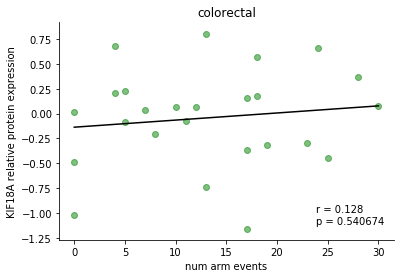

In [307]:
col = sample_info[sample_info.loc[:,'lineage']=='colorectal'].index
sh = an_full_CCLE.index & protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index & col
plt.scatter(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'],color='green',alpha=.5,label=None)
plt.plot(np.unique(an_full_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(an_full_CCLE.loc[sh,'num_arm_events'], protein_quant_current_normalized.loc[sh,'KIF18A'], 1))(np.unique(an_full_CCLE.loc[sh,'num_arm_events'])),color='black')

r,p = scipy.stats.pearsonr(an_full_CCLE.loc[sh,'num_arm_events'],protein_quant_current_normalized.loc[sh,'KIF18A'])
plt.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
plt.title('colorectal')

plt.xlabel('num arm events')
plt.ylabel('KIF18A relative protein expression')
plotting.simpleaxis()

plt.savefig('kif18a_protein_colorectal.png')

In [10]:
public_19Q4_proteincoding_tpm.columns = public_19Q4_proteincoding_tpm.columns.str.split(' ').str[0]

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

colorectal_Diploid v.s. colorectal_Aneuploid: t-test independent samples, P_val=7.093e-01 stat=-3.765e-01
blood_Diploid v.s. blood_Aneuploid: t-test independent samples, P_val=2.525e-01 stat=1.157e+00
ovary_Diploid v.s. ovary_Aneuploid: t-test independent samples, P_val=3.639e-01 stat=9.225e-01
skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=4.403e-01 stat=7.892e-01


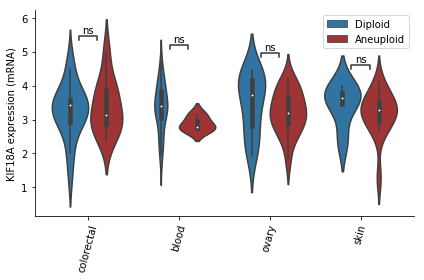

In [31]:
shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index) 
#shared =  set(protein_quant_current_normalized.index) 


#without_na = gene_effect_rnai_relative.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


relative_box = public_19Q4_proteincoding_tpm.loc[shared]#gene_effect_rnai_relative.loc[shared]

relative_box['lineage'] = sample_info_.loc[relative_box.index,'lineage']





relative_box['ploidy'] = anot.loc[relative_box.index,'many_arm_events']

trus = relative_box[relative_box.loc[:,'ploidy']==True].index 
relative_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = relative_box[relative_box.loc[:,'ploidy']==False].index 
relative_box.loc[falsee,'ploidy']=  'Diploid'

#only lineage_subtypes we want
relative_box.index = pd.Series(relative_box.index,name='CCLE_ID')
relative_box.columns = pd.Series(relative_box.columns,name=False)
to_drop = []

lines = relative_box.loc[:,'lineage'].copy()

for x in lines.index:

    if  lines.loc[x] != 'blood' \
        and lines.loc[x] != 'skin' and lines.loc[x] != 'ovary' \
        and lines.loc[x] != 'colorectal':
            to_drop.append(x)
            
relative_box_ = relative_box.drop(to_drop)

relative_box_.columns = relative_box_.columns.str.split(' ').str[0]

ax = sns.violinplot(x="lineage", y="KIF18A", hue="ploidy",
                     data=relative_box_.loc[:,['KIF18A','lineage', 'ploidy']].dropna() ,palette = my_pal,hue_order=['Diploid','Aneuploid'],)#order=['blood','skin','ovary','colorectal'])#palette="muted")

new_pairs = []

for lin in set(relative_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

    
width = 0.4
add_stat_annotation(ax, data=relative_box_.loc[:,['KIF18A','lineage', 'ploidy']].dropna(), x='lineage', y='KIF18A', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,)#order=['blood','skin','ovary','colorectal'])




plt.xticks(rotation=75) 
plt.xlabel('')
plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.ylabel('KIF18A expression (mRNA)')
plt.tight_layout()

plt.savefig('kif18a_ploidy_lineage_subtypes_revision_mrna_NEW.png')

In [322]:
5.588e-01

0.5588

In [ ]:
anot

In [318]:
pd.Series(Counter(sample_info_.loc[sample_info_.index,'lineage_subtype'].dropna())).sort_values().iloc[-40:]

gallbladder_adenocarcinoma       11
ATRT                             12
MPNST                            14
prostate_adenocarcinoma          14
uveal_melanoma                   14
retinoblastoma                   15
malignant_rhabdoid_tumor         16
esophagus_adenocarcinoma         16
thyroid_carcinoma                22
medulloblastoma                  23
liposarcoma                      24
hepatocellular_carcinoma         25
ovary_carcinoma                  26
lymphoma_unspecified             27
CML                              30
endometrial_adenocarcinoma       31
esophagus_squamous               34
rhabdomyosarcoma                 35
osteosarcoma                     36
mesothelioma                     36
breast_carcinoma                 38
bladder_carcinoma                40
breast_ductal_carcinoma          46
cholangiocarcinoma               46
multiple_myeloma                 47
gastric_adenocarcinoma           50
Ewing_sarcoma                    57
renal_cell_carcinoma        

In [ ]:
AML 
large_intestine (no) colorectal_adenocarcinoma?
multiple_myeloma



In [81]:
from collections import Counter

pd.Series(Counter(relative_box.loc[:,['KIF18A','lineage', 'ploidy']].dropna().loc[:,'lineage'])).sort_values()

thyroid                    1
urinary_tract              1
upper_aerodigestive        2
prostate                   2
plasma_cell                3
liver                      3
bone                       3
kidney                     4
lymphocyte                 5
soft_tissue                6
pancreas                   7
blood                      7
gastric                    7
esophagus                  8
skin                       9
central_nervous_system     9
ovary                     10
breast                    11
uterus                    11
colorectal                13
lung                      25
dtype: int64

In [103]:
from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')


In [284]:
protein_quant_current_normalized

Gene_Symbol,SLC12A2,HOXD13,KDM1A,SOX1,SOX2,SOX3,SOX15,PHOX2B,ALX4,ALX1,...,SLC46A3,MT-ND2,MT-ND3,BMP6,METTL20,CCL26,ALOX5AP,CYSTM1,MGST2,CNIH4
MDAMB468_BREAST,2.111348,NaN,0.379683,NaN,-0.246367,NaN,NaN,NaN,NaN,NaN,...,1.040703,NaN,0.433789,NaN,NaN,NaN,NaN,-0.313512,NaN,0.138191
SH4_SKIN,0.070468,NaN,-0.283538,NaN,-0.572753,NaN,NaN,NaN,NaN,NaN,...,-0.949250,NaN,-0.149629,NaN,NaN,NaN,NaN,0.105086,NaN,0.355856
AU565_BREAST,-0.463928,NaN,0.191211,NaN,-0.341305,NaN,NaN,NaN,NaN,NaN,...,0.242156,NaN,-0.376248,NaN,NaN,NaN,NaN,-0.586815,NaN,0.001459
KMRC1_KIDNEY,-0.883645,NaN,-0.595606,NaN,-0.335211,NaN,NaN,NaN,NaN,NaN,...,1.222895,NaN,-0.915686,NaN,NaN,NaN,NaN,-0.132940,NaN,0.172501
CAL51_BREAST,0.788565,NaN,0.391243,NaN,-0.124474,NaN,NaN,NaN,NaN,NaN,...,-0.212603,NaN,0.793730,NaN,NaN,NaN,NaN,0.452423,NaN,0.200756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FADU_UPPER_AERODIGESTIVE_TRACT,-0.071063,NaN,-0.817245,NaN,2.549687,NaN,5.361021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023850,-0.177391,NaN,-1.291515
KP4_PANCREAS,0.702306,NaN,-0.790010,NaN,4.424095,NaN,-1.028932,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.393552,0.445977,NaN,-0.944284
MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-1.395878,NaN,0.929522,NaN,-1.083698,NaN,0.729380,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.556818,-2.497558,NaN,-1.022551
OVCAR8_OVARY,-1.165032,NaN,-0.828736,NaN,-1.640990,NaN,-0.534041,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.531699,0.964551,NaN,0.220199


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


p-value for BUB1B: 0.11927284784738938


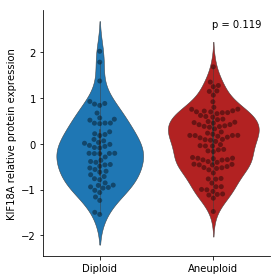

In [27]:
fig,axx = plt.subplots(figsize=(4,4))


shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index)
temp = protein_quant_current_normalized.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'KIF18A'].dropna(),protein_quant_current_normalized.loc[falsee,'KIF18A'].dropna())
print('p-value for BUB1B: ' + str(p_val))
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
plotting.simpleaxis()
plt.ylabel('KIF18A relative protein expression')
plt.xlabel('')
plt.tight_layout()
plt.savefig('review_plots/kif18a_just_ploidy_revision_protein.png')

In [28]:
protein_quant_current_normalized_ = protein_quant_current_normalized.loc[:,['KIF18A']].dropna()

In [30]:
# now need to regress out lineage from the relative protein expression data


from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[protein_quant_current_normalized_.index,'lineage'])
mu = protein_quant_current_normalized_.mean()
reg = LinearRegression().fit(one_hot, protein_quant_current_normalized_)
preds = pd.DataFrame(reg.predict(one_hot),index = protein_quant_current_normalized_.index,columns = protein_quant_current_normalized_.columns)

preds_ = preds 
corrected_protein = ((protein_quant_current_normalized_  - mu)- preds_)+ mu




/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


p-value for BUB1B: 0.15913991357434384


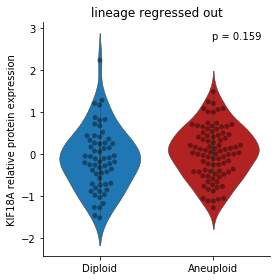

In [32]:
fig,axx = plt.subplots(figsize=(4,4))


shared = set(anot_CCLE.index) & set(corrected_protein.index)
temp = corrected_protein.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)


from scipy import stats
tt,p_val = stats.ttest_ind(corrected_protein.loc[trus,'KIF18A'].dropna(),corrected_protein.loc[falsee,'KIF18A'].dropna())
print('p-value for BUB1B: ' + str(p_val))
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
plotting.simpleaxis()
plt.ylabel('KIF18A relative protein expression')
plt.xlabel('')
plt.title('lineage regressed out')
plt.tight_layout()
plt.savefig('review_plots/kif18a_just_ploidy_revision_lineage_corrected_protein.png')


In [416]:

table = pd.DataFrame(columns = ['num_lines','num_true','num_false','t-stat','p-value'],index = set(sample_info.loc[anot_CCLE.index,'lineage']))

for lineage in set(sample_info.loc[anot_CCLE.index,'lineage']):
    all_lines = sample_info[sample_info.loc[:,'lineage'] == lineage].index
    all_lines = set(all_lines) & set(anot_CCLE.index) & set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index)
    trus = anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == True].index
    fals =  anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == False].index
    tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'KIF18A'].dropna(),protein_quant_current_normalized.loc[fals,'KIF18A'].dropna())
    table.loc[lineage] = [len(all_lines),len(trus),len(fals),tt,p_val]

    

table.to_csv('t_test_results_KIF18A_protein_per_lineage.csv')



protein_quant_current_normalized.loc[:,['KIF18A']]
sample_info
anot_CCLE

table2 = pd.DataFrame(columns = ['num_lines','R','p-value'],index = set(sample_info.loc[anot_CCLE.index,'lineage']))

for lineage in set(sample_info.loc[an_full_CCLE.index,'lineage']):
    all_lines = sample_info[sample_info.loc[:,'lineage'] == lineage].index
    all_lines = set(all_lines) & set(an_full_CCLE.index) & set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index)
#     trus = anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == True].index
#     fals =  anot_CCLE.loc[all_lines][anot_CCLE.loc[all_lines,'many_arm_events'] == False].index
    #tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'KIF18A'].dropna(),protein_quant_current_normalized.loc[fals,'KIF18A'].dropna())
    r,p = scipy.stats.pearsonr(an_full_CCLE.loc[all_lines,'num_arm_events'],protein_quant_current_normalized.loc[all_lines,'KIF18A'])


    table2.loc[lineage] = [len(all_lines),r,p]

    

table2.to_csv('correlation_results_KIF18A_protein_per_lineage.csv')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3005: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3006: RuntimeWarning: Mean of empty slice.
  my = y.mean()


In [418]:
table2

,num_lines,R,p-value
ovary,15,0.671083,0.00616392
prostate,4,0.714094,0.285906
peripheral_nervous_system,1,NaN,NaN
esophagus,13,0.298466,0.321917
soft_tissue,7,0.728121,0.063536
liver,13,-0.0945917,0.758554
bone,5,0.091997,0.883031
kidney,9,-0.668635,0.0489502
gastric,14,0.108149,0.712864
blood,17,-0.376219,0.136656


In [402]:
# fig,axx = plt.subplots(figsize=(4,4))


# shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
# temp = public_19Q4_proteincoding_tpm.loc[shared]
# temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

# trus = temp[temp.loc[:,'ploidy']==True].index 
# temp.loc[trus,'ploidy']= 'Aneuploid'
# falsee = temp[temp.loc[:,'ploidy']==False].index 
# temp.loc[falsee,'ploidy']=  'Diploid'


# temp.columns = temp.columns.str.split(' ').str[0]


# sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
# sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),order=my_order,color='black',alpha=.3)



# from scipy import stats
# tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A'].dropna(),temp.loc[falsee,'KIF18A'].dropna())

# plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
# plotting.simpleaxis()
# plt.ylabel('KIF18A expression (mRNA)')
# plt.xlabel('')

# plt.savefig('kif18a_just_ploidy_revision_mrna.png')

In [38]:
from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

In [39]:
gene_effect_rnai_achilles.columns = gene_effect_rnai_achilles.columns.str.split(' ').str[0]
gene_effect_rnai_drive.columns = gene_effect_rnai_drive.columns.str.split(' ').str[0]
gene_effect_crispr_achilles.columns = gene_effect_crispr_achilles.columns.str.split(' ').str[0]

In [40]:
gene_effect_crispr_achilles.index = sample_info_.loc[gene_effect_crispr_achilles.index,'CCLE_Name']


In [156]:
# import scipy
# from scipy import stats

# shared = set(gene_effect_rnai_drive.loc[:,'KIF18A'].dropna().index) & set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index)


# fig,ax= plt.subplots()
# plt.scatter(gene_effect_rnai_drive.loc[shared,'KIF18A'],protein_quant_current_normalized.loc[shared,'KIF18A'],label=None)

# plt.xlabel('dependency (rnai drive)')
# plt.ylabel('KIF18A relative protein expression')

# plotting.simpleaxis()


# plt.plot(np.unique(gene_effect_rnai_drive.loc[shared,'KIF18A']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[shared,'KIF18A'], protein_quant_current_normalized.loc[shared,'KIF18A'], 1))(np.unique(gene_effect_rnai_drive.loc[shared,'KIF18A'])),color='black')

# r,p = scipy.stats.pearsonr(gene_effect_rnai_drive.loc[shared,'KIF18A'],protein_quant_current_normalized.loc[shared,'KIF18A'])
# ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)




In [34]:
public_19Q4_proteincoding_tpm_ccle =  public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_ccle.index = sample_info_.loc[public_19Q4_proteincoding_tpm.index,'CCLE_Name']

In [31]:
#aneuploidy_data.index = aneuploidy_data.loc[:,'DepMap_ID']

In [35]:
#public_19Q4_proteincoding_tpm_ccle
public_19Q4_proteincoding_tpm_ccle.columns = public_19Q4_proteincoding_tpm_ccle.columns.str.split(' ').str[0]

In [36]:
public_19Q4_proteincoding_tpm_ccle.columns#.str.split(' ').str[0]

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'SCYGR3', 'SCYGR7', 'OR8S1', 'SCYGR6', 'OR4F29', 'EEF1AKMT4', 'TBCE',
       'OOSP4A', 'ARHGAP11B', 'OOSP3'],
      dtype='object', length=19144)

No handles with labels found to put in legend.


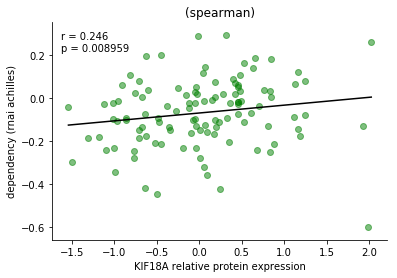

In [46]:
import scipy
from scipy import stats

shared = set(protein_quant_current_normalized.loc[:,'KIF18A'].dropna().index) & set(gene_effect_rnai_achilles.loc[:,'KIF18A'].dropna().index)


fig,ax= plt.subplots()
plt.scatter(protein_quant_current_normalized.loc[shared,'KIF18A'],gene_effect_rnai_achilles.loc[shared,'KIF18A'],label=None,color='green',alpha=.5)

plt.ylabel('dependency (rnai achilles)')
plt.xlabel('KIF18A relative protein expression')

plotting.simpleaxis()


plt.plot(np.unique(protein_quant_current_normalized.loc[shared,'KIF18A']), np.poly1d(np.polyfit(protein_quant_current_normalized.loc[shared,'KIF18A'], gene_effect_rnai_achilles.loc[shared,'KIF18A'], 1))(np.unique(protein_quant_current_normalized.loc[shared,'KIF18A'])),color='black')

r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[shared,'KIF18A'],protein_quant_current_normalized.loc[shared,'KIF18A'])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
plt.title('(spearman)')

plt.savefig('review_plots/corr_protein_rnai_achilles_kif18a_SPEARMAN.png')


No handles with labels found to put in legend.


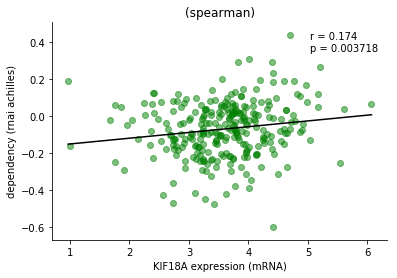

In [47]:
import scipy
from scipy import stats

shared = set(public_19Q4_proteincoding_tpm_ccle.loc[:,'KIF18A'].dropna().index) & set(gene_effect_rnai_achilles.loc[:,'KIF18A'].dropna().index)


fig,ax= plt.subplots()
plt.scatter(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'],gene_effect_rnai_achilles.loc[shared,'KIF18A'],label=None,alpha=.5,color='green')

plt.ylabel('dependency (rnai achilles)')
plt.xlabel('KIF18A expression (mRNA)')

plotting.simpleaxis()


plt.plot(np.unique(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A']), np.poly1d(np.polyfit(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'], gene_effect_rnai_achilles.loc[shared,'KIF18A'], 1))(np.unique(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'])),color='black')

r,p = scipy.stats.spearmanr(public_19Q4_proteincoding_tpm_ccle.loc[shared,'KIF18A'],gene_effect_rnai_achilles.loc[shared,'KIF18A'])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)
plt.title('(spearman)')

plt.savefig('review_plots/corr_mrna_rnai_achilles_kif18a_SPEARMAN.png')


In [190]:
CCLE_expression = tc.get(name='public-19q4-93d9', version=21, file='CCLE_expression')

In [192]:
CCLE_expression.columns = CCLE_expression.columns.str.split(' ').str[0]

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SCYGR3,SCYGR7,OR8S1,SCYGR6,OR4F29,EEF1AKMT4,TBCE,OOSP4A,ARHGAP11B,OOSP3
ACH-001097,0.000000,0.000000,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106,2.150560,...,0.0,0.0,0.000000,0.0,0.000000,2.980025,5.132988,0.000000,0.443607,0.000000
ACH-001804,4.934988,0.000000,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474,4.139961,...,0.0,0.0,0.000000,0.0,0.000000,2.283922,4.288359,0.000000,0.475085,0.000000
ACH-000534,0.839960,0.000000,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460,3.157044,...,0.0,0.0,0.000000,0.0,0.000000,1.333424,4.841470,0.000000,3.904966,0.000000
ACH-000742,3.722466,0.000000,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194,3.258519,...,0.0,0.0,0.000000,0.0,0.000000,1.526069,4.494416,0.000000,0.941106,0.000000
ACH-000836,4.632268,0.000000,6.704180,2.792855,4.079805,0.097611,1.150560,5.729553,4.802193,4.372256,...,0.0,0.0,0.000000,0.0,0.000000,2.983678,4.743623,0.000000,2.650765,0.765535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000904,4.316870,0.028569,5.990955,3.185867,4.846493,0.286881,0.111031,4.799087,4.995485,4.660495,...,0.0,0.0,0.000000,0.0,0.000000,3.831877,5.882888,0.000000,3.063503,0.000000
ACH-000110,5.227279,0.070389,6.764341,3.537296,4.491212,0.150560,1.150560,5.537296,5.776894,4.766065,...,0.0,0.0,0.000000,0.0,0.014355,4.644433,4.605850,0.000000,1.906891,0.000000
ACH-000261,4.447579,0.028569,6.748864,2.650765,4.607626,0.042644,0.687061,6.400367,4.274262,4.828835,...,0.0,0.0,0.097611,0.0,0.000000,2.615887,4.613532,0.000000,2.411426,0.042644
ACH-000031,4.714795,0.028569,6.745910,2.776104,3.621759,0.056584,3.095924,6.936049,4.976822,4.451541,...,0.0,0.0,0.263034,0.0,0.070389,4.476382,4.425594,0.422233,2.014355,0.084064
